In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

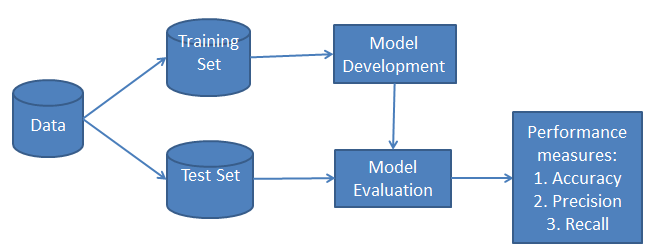

In [32]:
data = pd.read_csv('Naive-Bayes-Classification-Data.csv')

In [33]:
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [34]:
data.columns, data.describe()

(Index(['glucose', 'bloodpressure', 'diabetes'], dtype='object'),
           glucose  bloodpressure    diabetes
 count  995.000000     995.000000  995.000000
 mean    44.306533      79.184925    0.500503
 std      6.707567       9.340204    0.500251
 min     20.000000      50.000000    0.000000
 25%     40.000000      72.000000    0.000000
 50%     45.000000      80.000000    1.000000
 75%     50.000000      87.000000    1.000000
 max     70.000000     100.000000    1.000000)

In [35]:
x = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=7)

In [37]:
model = GaussianNB()

In [38]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred = model.predict(x_test)

In [40]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1])

In [41]:
accuracy = accuracy_score(y_test, y_pred)

In [42]:
accuracy

0.9397590361445783

### separate dataset to show mixing categorical data - we must first transform this which I have shown

In [187]:
#first things first, we need data to play with today
# https://www.kaggle.com/andrewsundberg/college-basketball-dataset?select=cbb15.csv
# best practice
path = 'cbb.csv'
#this is our data
bball = pd.read_csv(path)

In [188]:
# this is for later proof
bball.CONF.value_counts()

ACC     75
SEC     70
A10     70
CUSA    70
B10     70
Slnd    65
MEAC    64
MAC     60
P12     60
OVC     60
BSky    60
SB      58
Amer    57
MAAC    55
MWC     55
BSth    54
WCC     50
CAA     50
SWAC    50
BE      50
MVC     50
NEC     50
B12     50
Pat     50
SC      50
Horz    49
BW      45
AE      45
Sum     43
WAC     41
ASun    40
Ivy     40
Ind      1
Name: CONF, dtype: int64

In [189]:
# this is how we get a 'labelEncoder' object - just like all our other objects...copy and paste these
labelEncoder = preprocessing.LabelEncoder()

In [193]:
# some handling of data values which may produce errors

# check for null values and set them to the data type of the rest of the column
bball.SEED = bball.SEED.fillna(0)
bball.POSTSEASON = bball.POSTSEASON.fillna('0')

# to show you that this label encoder makes strings into a list of numbers mapped one-to-one
print (labelEncoder.fit_transform(bball.POSTSEASON))
print (labelEncoder.fit_transform(bball.CONF))

[1 1 1 ... 8 8 8]
[ 1  5  5 ... 27 32 32]


In [195]:
# this is how to make a new list or new dataframe column with our newly transformed datas
enc_conf = labelEncoder.fit_transform(bball.CONF)
enc_postseason = labelEncoder.fit_transform(bball.POSTSEASON)
bball['enc_conf'] = enc_conf

In [196]:
# proof this worked like we thought:)
bball['enc_conf'].value_counts()

1     75
0     70
27    70
5     70
12    70
29    65
18    64
8     60
23    60
22    60
17    60
25    58
4     57
16    55
20    55
9     54
28    50
26    50
6     50
7     50
24    50
19    50
11    50
21    50
32    50
13    49
10    45
2     45
30    43
31    41
15    40
3     40
14     1
Name: enc_conf, dtype: int64

In [197]:
# feel free to play with this list...just grabbed a few i thought were interesting
features = ['enc_conf', 'ADJOE', 'W', 'BARTHAG', 'WAB', 'SEED']

In [198]:
# make our x and y...features and label columns
x = bball[features]
y = enc_postseason

In [199]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=7)

In [169]:
# get ourselves a model object
model = GaussianNB()

In [170]:
# train the model
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [171]:
# get our predictions
y_pred = model.predict(x_test)

In [172]:
# find the accuracy of our predictions...fingers crossed!
accuracy = accuracy_score(y_test, y_pred)

In [200]:
# not btoo bad!
accuracy

0.8818181818181818